In [7]:
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sn
from tqdm import tqdm
import matplotlib.pyplot as plt

import sklearn
from sklearn.manifold import TSNE

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function

from models import *
from utils import *
from datasets import *

In [8]:
import torchvision as tv
import torchvision.transforms as transforms
from torch.autograd import Variable
from torchvision.utils import save_image

# Data Preprocessing

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.1307,), (0.3081,))])
trainset = tv.datasets.MNIST(root='./data',  train=True, download=False, transform=transform)
testset = tv.datasets.MNIST(root='./data',  train=False, download=False, transform=transform)

# sample
idx = np.random.choice(np.arange(len(trainset)), size=1000)
trainset = [trainset[i] for i in idx]
idx = np.random.choice(np.arange(len(testset)), size=1000)
testset = [testset[i] for i in idx]

traindata = [i[0].unsqueeze(0) for i in trainset]
trainlabel = [i[1] for i in trainset]
testdata = [i[0].unsqueeze(0) for i in testset]
testlabel = [i[1] for i in testset]

X_train = torch.vstack(traindata)
y_train = torch.tensor(trainlabel)
X_test = torch.vstack(testdata)
y_test = torch.tensor(testlabel)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1000, 1, 28, 28]),
 torch.Size([1000, 1, 28, 28]),
 torch.Size([1000]),
 torch.Size([1000]))

# umap + emb

In [3]:
import umap

time_cost = []

for n in [5, 10, 20, 50, 100, 200]:
    
    for min_dist in [0.03, 0.1, 0.25, 0.5, 0.8, 0.99]:

        t1 = time.time()
        reducer = umap.UMAP(n_neighbors=n, min_dist=min_dist, n_components=2, metric='euclidean')
        emb = reducer.fit_transform(X_train.view(-1, 28*28))
        t2 = time.time()
        print("n_neighbors: {}, min_dist:{}, time: {}".format(n, min_dist, t2-t1))
        time_cost.append(t2-t1)

        draw_z(
            z=normalise(emb), 
            cls=y_train, 
            s=10, 
            title="n: {}, min_dist: {}, time: {}".format(n, min_dist, t2-t1), 
            display=False, 
            save_path="./data/facts_check/vis_umapemb_n{}_mindist{}.png".format(n, min_dist)
        )

n_neighbors: 5, min_dist:0.03, time: 6.8739988803863525
n_neighbors: 5, min_dist:0.1, time: 2.505990743637085
n_neighbors: 5, min_dist:0.25, time: 2.3779854774475098
n_neighbors: 5, min_dist:0.5, time: 2.706998109817505
n_neighbors: 5, min_dist:0.8, time: 2.465991735458374
n_neighbors: 5, min_dist:0.99, time: 2.7969980239868164
n_neighbors: 10, min_dist:0.03, time: 2.552992582321167
n_neighbors: 10, min_dist:0.1, time: 2.477992057800293
n_neighbors: 10, min_dist:0.25, time: 2.551992893218994
n_neighbors: 10, min_dist:0.5, time: 2.432990789413452
n_neighbors: 10, min_dist:0.8, time: 2.851626396179199
n_neighbors: 10, min_dist:0.99, time: 2.541991710662842
n_neighbors: 20, min_dist:0.03, time: 2.959993600845337
n_neighbors: 20, min_dist:0.1, time: 2.6369986534118652
n_neighbors: 20, min_dist:0.25, time: 2.8499929904937744
n_neighbors: 20, min_dist:0.5, time: 2.6279993057250977
n_neighbors: 20, min_dist:0.8, time: 2.9150285720825195
n_neighbors: 20, min_dist:0.99, time: 2.6660304069519043

d:\anaconda3\envs\torch\lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


n_neighbors: 50, min_dist:0.25, time: 2.8859987258911133


d:\DV_HL\utils.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(dpi=1500)


n_neighbors: 50, min_dist:0.5, time: 3.704000234603882
n_neighbors: 50, min_dist:0.8, time: 3.4721620082855225
n_neighbors: 50, min_dist:0.99, time: 3.138990640640259
n_neighbors: 100, min_dist:0.03, time: 3.5471444129943848
n_neighbors: 100, min_dist:0.1, time: 3.253999710083008
n_neighbors: 100, min_dist:0.25, time: 3.843921661376953
n_neighbors: 100, min_dist:0.5, time: 3.0449984073638916
n_neighbors: 100, min_dist:0.8, time: 3.2099931240081787
n_neighbors: 100, min_dist:0.99, time: 3.146723985671997
n_neighbors: 200, min_dist:0.03, time: 3.441993236541748
n_neighbors: 200, min_dist:0.1, time: 3.195993185043335
n_neighbors: 200, min_dist:0.25, time: 3.1964986324310303
n_neighbors: 200, min_dist:0.5, time: 3.472907304763794
n_neighbors: 200, min_dist:0.8, time: 3.2189924716949463
n_neighbors: 200, min_dist:0.99, time: 3.3729987144470215


<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

<Figure size 9600x7200 with 0 Axes>

# umap + nn

### umap - github

In [21]:
len(epochs_per_sample_train), len(head_train)

(27020, 27020)

In [14]:
for n in [5, 10, 20]:
    
    for min_dist in [0.03, 0.1, 0.25, 0.5, 0.8, 0.99]:

        # for negative_sample_rate in [10, 20]:
        for negative_sample_rate in [50]:

            print("n_neighbours: {}, min_dist: {}".format(n, min_dist))

            # 1. dataset
            batch_size = 1000 # 1024

            # construct graph of nearest neighbors
            graph_constructor_train =  ConstructUMAPGraph(metric='euclidean', n_neighbors=n, batch_size=1000, random_state=42)
            epochs_per_sample_train, head_train, tail_train, weight_train = graph_constructor_train(X_train)

            graph_constructor_test =  ConstructUMAPGraph(metric='euclidean', n_neighbors=n, batch_size=1000, random_state=42)
            epochs_per_sample_test, head_test, tail_test, weight_test = graph_constructor_test(X_test)

            train_dataset = UMAPDataset(
                data=X_train, labels=y_train, 
                epochs_per_sample=epochs_per_sample_train, head=head_train, tail=tail_train, weight=weight_train, 
                device='cuda', batch_size=batch_size, feedback=None
            )
            test_dataset = UMAPDataset(
                data=X_test, labels=y_test, 
                epochs_per_sample=epochs_per_sample_test, head=head_test, tail=tail_test, weight=weight_test, 
                device='cuda', batch_size=batch_size, feedback=None
            )

            criterion = UMAPLoss(device='cuda', min_dist=min_dist, batch_size=batch_size, negative_sample_rate=negative_sample_rate, edge_weight=None, repulsion_strength=1.0)

            # 2. model
            class Encoder(nn.Module):

                def __init__ (self, output_dim=2):
                    super().__init__()
                    self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=2)
                    self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2)
                    self.flatten = nn.Flatten()
                    self.linear1 = nn.Linear(128*6*6, 512)
                    self.linear2 = nn.Linear(512, 512)
                    self.linear3 = nn.Linear(512, output_dim)

                def forward(self, x):
                    x = F.relu(self.conv1(x))
                    x = F.relu(self.conv2(x))
                    x = self.flatten(x)
                    x = F.relu(self.linear1(x))
                    x = F.relu(self.linear2(x))
                    x = F.relu(self.linear3(x))

                    return x

            model = Encoder(output_dim=2).cuda()
            # print(model)
            # print("num params: {}".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

            # 3. training
            optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

            train_losses = []
            for epoch in tqdm(range(20)):
                # 100 epoch - n_neighbour<50 10min; >50 40min
                train_loss = 0.
                # for batch_to, batch_from in tqdm(train_dataset.get_batches()):
                for batch_to, batch_from, batch_index_to, batch_index_from, labels, feedback in train_dataset.get_batches():
                    optimizer.zero_grad()
                    embedding_to = model(batch_to)
                    embedding_from = model(batch_from)
                    loss = criterion(embedding_to, embedding_from)
                    train_loss += loss.item()
                    loss.backward()
                    optimizer.step()

                train_losses.append(train_loss)
                # print('epoch: {}, loss: {}'.format(epoch, train_loss))

            torch.save(model.state_dict(), './data/facts_check/umap_n{}_dist{}_neg{}.pt'.format(n, min_dist, negative_sample_rate))
            torch.save(torch.tensor(train_losses), './data/facts_check/loss_umap_n{}_dist{}_neg{}.pt'.format(n, min_dist, negative_sample_rate))

n_neighbours: 5, min_dist: 0.03
Thu Nov 30 21:46:42 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:42 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations
Thu Nov 30 21:46:42 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:42 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations


100%|██████████| 20/20 [00:00<00:00, 21.79it/s]


n_neighbours: 5, min_dist: 0.1
Thu Nov 30 21:46:43 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:43 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations
Thu Nov 30 21:46:43 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:43 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations


100%|██████████| 20/20 [00:00<00:00, 25.35it/s]


n_neighbours: 5, min_dist: 0.25
Thu Nov 30 21:46:44 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:44 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations
Thu Nov 30 21:46:44 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:44 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations


100%|██████████| 20/20 [00:00<00:00, 26.70it/s]


n_neighbours: 5, min_dist: 0.5
Thu Nov 30 21:46:45 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:45 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations
Thu Nov 30 21:46:45 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:45 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations


100%|██████████| 20/20 [00:00<00:00, 24.33it/s]


n_neighbours: 5, min_dist: 0.8
Thu Nov 30 21:46:46 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:46 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations
Thu Nov 30 21:46:46 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:46 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations


100%|██████████| 20/20 [00:00<00:00, 23.81it/s]


n_neighbours: 5, min_dist: 0.99
Thu Nov 30 21:46:47 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:47 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations
Thu Nov 30 21:46:47 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:47 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations


100%|██████████| 20/20 [00:00<00:00, 23.89it/s]


n_neighbours: 10, min_dist: 0.03
Thu Nov 30 21:46:48 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:48 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations
Thu Nov 30 21:46:49 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:49 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations


100%|██████████| 20/20 [00:04<00:00,  4.96it/s]


n_neighbours: 10, min_dist: 0.1
Thu Nov 30 21:46:53 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:53 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations
Thu Nov 30 21:46:53 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:53 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations


100%|██████████| 20/20 [00:04<00:00,  4.76it/s]


n_neighbours: 10, min_dist: 0.25
Thu Nov 30 21:46:57 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:57 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations
Thu Nov 30 21:46:57 2023 Building RP forest with 7 trees
Thu Nov 30 21:46:57 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations


100%|██████████| 20/20 [00:04<00:00,  4.69it/s]


n_neighbours: 10, min_dist: 0.5
Thu Nov 30 21:47:02 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:02 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations
Thu Nov 30 21:47:02 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:02 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations


100%|██████████| 20/20 [00:03<00:00,  5.13it/s]


n_neighbours: 10, min_dist: 0.8
Thu Nov 30 21:47:06 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:06 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations
Thu Nov 30 21:47:06 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:06 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations


100%|██████████| 20/20 [00:03<00:00,  5.14it/s]


n_neighbours: 10, min_dist: 0.99
Thu Nov 30 21:47:10 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:10 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	 5  /  10
	Stopping threshold met -- exiting after 5 iterations
Thu Nov 30 21:47:10 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:10 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations


100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


n_neighbours: 20, min_dist: 0.03
Thu Nov 30 21:47:14 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:14 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations
Thu Nov 30 21:47:14 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:14 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


n_neighbours: 20, min_dist: 0.1
Thu Nov 30 21:47:32 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:32 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations
Thu Nov 30 21:47:32 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:32 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	Stopping threshold met -- exiting after 3 iterations


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


n_neighbours: 20, min_dist: 0.25
Thu Nov 30 21:47:50 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:50 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	 4  /  10
	Stopping threshold met -- exiting after 4 iterations
Thu Nov 30 21:47:50 2023 Building RP forest with 7 trees
Thu Nov 30 21:47:50 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	Stopping threshold met -- exiting after 3 iterations


100%|██████████| 20/20 [00:17<00:00,  1.12it/s]


n_neighbours: 20, min_dist: 0.5
Thu Nov 30 21:48:08 2023 Building RP forest with 7 trees
Thu Nov 30 21:48:08 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	Stopping threshold met -- exiting after 3 iterations
Thu Nov 30 21:48:08 2023 Building RP forest with 7 trees
Thu Nov 30 21:48:09 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	Stopping threshold met -- exiting after 3 iterations


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


n_neighbours: 20, min_dist: 0.8
Thu Nov 30 21:48:26 2023 Building RP forest with 7 trees
Thu Nov 30 21:48:26 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	Stopping threshold met -- exiting after 3 iterations
Thu Nov 30 21:48:26 2023 Building RP forest with 7 trees
Thu Nov 30 21:48:26 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	Stopping threshold met -- exiting after 3 iterations


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


n_neighbours: 20, min_dist: 0.99
Thu Nov 30 21:48:45 2023 Building RP forest with 7 trees
Thu Nov 30 21:48:45 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	Stopping threshold met -- exiting after 3 iterations
Thu Nov 30 21:48:45 2023 Building RP forest with 7 trees
Thu Nov 30 21:48:45 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	Stopping threshold met -- exiting after 3 iterations


100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


In [15]:
import glob

all_models = glob.glob("./data/facts_check/umap*neg*.pt")
# all_models = glob.glob("./data/facts_check/umap_n5_dist*.pt")
# all_models = ["./data/facts_check\\umap_n5_dist0.8.pt"]

for i in tqdm(range(len(all_models))):

    model.load_state_dict(torch.load(all_models[i]))

    model.eval()

    emb = model(X_train.cuda())

    title = all_models[i].split("\\")[-1][:-3]

    draw_z(
        z=normalise(emb.detach().cpu()), 
        cls=y_train, 
        s=10, 
        title=title, 
        save_path="./data/facts_check/vis_{}.png".format(title), 
        display=False)

100%|██████████| 54/54 [04:00<00:00,  4.44s/it]


In [16]:
train_losses

[397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031,
 397.3088684082031]

In [19]:
emb

tensor([[ 0.0000, 24.6706],
        [ 0.0000, 40.7593],
        [ 0.0000, 45.6523],
        ...,
        [ 0.0000, 24.3131],
        [ 0.0000, 34.4304],
        [ 0.0000, 27.7081]], device='cuda:0', grad_fn=<ReluBackward0>)

In [17]:
title

'umap_n5_dist0.8'

In [7]:
"./data/facts_check/vis_{}.png".format(title)

'./data/facts_check/vis_umap_n5_dist0.99.png'

In [51]:
all_models[0].split("\\")[-1][:-3]

'umap_n100_dist0.03'

In [50]:
all_models

['./data/facts_check\\umap_n100_dist0.03.pt',
 './data/facts_check\\umap_n100_dist0.1.pt',
 './data/facts_check\\umap_n10_dist0.03.pt',
 './data/facts_check\\umap_n10_dist0.1.pt',
 './data/facts_check\\umap_n10_dist0.25.pt',
 './data/facts_check\\umap_n10_dist0.5.pt',
 './data/facts_check\\umap_n10_dist0.8.pt',
 './data/facts_check\\umap_n10_dist0.99.pt',
 './data/facts_check\\umap_n20_dist0.03.pt',
 './data/facts_check\\umap_n20_dist0.1.pt',
 './data/facts_check\\umap_n20_dist0.25.pt',
 './data/facts_check\\umap_n20_dist0.5.pt',
 './data/facts_check\\umap_n20_dist0.8.pt',
 './data/facts_check\\umap_n20_dist0.99.pt',
 './data/facts_check\\umap_n50_dist0.03.pt',
 './data/facts_check\\umap_n50_dist0.1.pt',
 './data/facts_check\\umap_n50_dist0.25.pt',
 './data/facts_check\\umap_n50_dist0.5.pt',
 './data/facts_check\\umap_n50_dist0.8.pt',
 './data/facts_check\\umap_n50_dist0.99.pt',
 './data/facts_check\\umap_n5_dist0.03.pt',
 './data/facts_check\\umap_n5_dist0.1.pt',
 './data/facts_check\

### umap - github 60k

In [5]:
import torchvision as tv
import torchvision.transforms as transforms
from torch.autograd import Variable
from torchvision.utils import save_image

# Data Preprocessing

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.1307,), (0.3081,))])
trainset = tv.datasets.MNIST(root='./data',  train=True, download=False, transform=transform)
testset = tv.datasets.MNIST(root='./data',  train=False, download=False, transform=transform)

# # sample
# idx = np.random.choice(np.arange(len(trainset)), size=1000)
# trainset = [trainset[i] for i in idx]
# idx = np.random.choice(np.arange(len(testset)), size=1000)
# testset = [testset[i] for i in idx]

traindata = [i[0].unsqueeze(0) for i in trainset]
trainlabel = [i[1] for i in trainset]
testdata = [i[0].unsqueeze(0) for i in testset]
testlabel = [i[1] for i in testset]

X_train = torch.vstack(traindata)
y_train = torch.tensor(trainlabel)
X_test = torch.vstack(testdata)
y_test = torch.tensor(testlabel)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([60000, 1, 28, 28]),
 torch.Size([10000, 1, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000]))

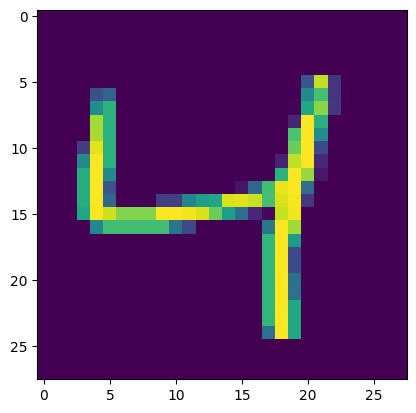

In [56]:
plt.imshow(X_train[2][0])

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Encoder(output_dim=2).to(device)
print(model)
print("num params: {}".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

Encoder(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=4608, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=2, bias=True)
)
num params: 2697986


In [9]:
for n in [20]:
    
    for min_dist in [0.1]:

        print("n_neighbours: {}, min_dist: {}".format(n, min_dist))

        # 1. dataset
        batch_size = 1000 # 1024

        # construct graph of nearest neighbors
        graph_constructor_train =  ConstructUMAPGraph(metric='euclidean', n_neighbors=n, batch_size=1000, random_state=42)
        epochs_per_sample_train, head_train, tail_train, weight_train = graph_constructor_train(X_train)

        graph_constructor_test =  ConstructUMAPGraph(metric='euclidean', n_neighbors=n, batch_size=1000, random_state=42)
        epochs_per_sample_test, head_test, tail_test, weight_test = graph_constructor_test(X_test)

        train_dataset = UMAPDataset(
            data=X_train, labels=y_train, 
            epochs_per_sample=epochs_per_sample_train, head=head_train, tail=tail_train, weight=weight_train, 
            device='cuda', batch_size=batch_size, feedback=None
        )
        test_dataset = UMAPDataset(
            data=X_test, labels=y_test, 
            epochs_per_sample=epochs_per_sample_test, head=head_test, tail=tail_test, weight=weight_test, 
            device='cuda', batch_size=batch_size, feedback=None
        )

        criterion = UMAPLoss(device='cuda', min_dist=min_dist, batch_size=batch_size, negative_sample_rate=5, edge_weight=None, repulsion_strength=1.0)

        # 2. model
        

        # 3. training
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

        train_losses = []
        for epoch in tqdm(range(100)):
            train_loss = 0.
            # for batch_to, batch_from in tqdm(train_dataset.get_batches()):
            for batch_to, batch_from, batch_index_to, batch_index_from, labels, feedback in train_dataset.get_batches():
                optimizer.zero_grad()
                embedding_to = model(batch_to.to(device))
                embedding_from = model(batch_from.to(device))
                loss = criterion(embedding_to, embedding_from)
                train_loss += loss.item()
                loss.backward()
                optimizer.step()

            train_losses.append(train_loss)
            # print('epoch: {}, loss: {}'.format(epoch, train_loss))

        torch.save(model.state_dict(), './data/facts_check/umap_n{}_dist{}.pt'.format(n, min_dist))
        torch.save(torch.tensor(train_losses), './data/facts_check/loss_umap_n{}_dist{}.pt'.format(n, min_dist))

n_neighbours: 20, min_dist: 0.1
Tue Nov 28 22:17:22 2023 Building RP forest with 17 trees
Tue Nov 28 22:17:27 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Tue Nov 28 22:17:41 2023 Building RP forest with 10 trees
Tue Nov 28 22:17:41 2023 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations


  1%|          | 1/100 [01:12<1:59:25, 72.38s/it]


KeyboardInterrupt: 

In [12]:
for batch_to, batch_from, batch_index_to, batch_index_from, labels, feedback in train_dataset.get_batches():
    break

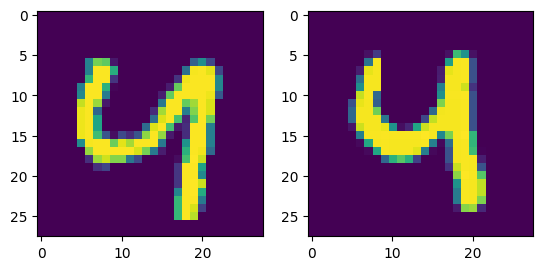

In [51]:
i = 789

plt.subplot(1,2,1)
plt.imshow(batch_from[i][0].detach().cpu())

plt.subplot(1,2,2)
plt.imshow(batch_to[i][0].detach().cpu())

plt.show()

In [53]:
embedding_to.shape, embedding_from.shape

(torch.Size([1000, 2]), torch.Size([1000, 2]))

In [ ]:
train_dataset.batches_per_epoch

1211

In [ ]:
plt.plot(train_losses/train_dataset.batches_per_epoch)
plt.show()

In [64]:
train_losses = torch.load("./data/facts_check/loss_umap_n20_dist0.1.pt")
plt.plot(train_losses/train_dataset.batches_per_epoch)
plt.show()